In [1]:
import pandas as pd
import numpy as np
import pypsa
import logging
import warnings
warnings.filterwarnings("ignore")
logging.basicConfig(level=logging.ERROR)

In [2]:
network = pypsa.Network(name='Texas')
network.import_from_netcdf('texas_grid.netcdf')
removed_lines = pd.DataFrame()
reduced_generators = pd.DataFrame()
buses_disconnected = pd.DataFrame()

In [3]:
def remove_lines_random(network,n=1):
    global removed_lines
    lines_to_remove = network.lines.sample(n)
    removed_lines = removed_lines.append(lines_to_remove)
    network.mremove("Line",lines_to_remove.index.to_series())
    return network
def reduce_generators_random(network,n=1,reduction_factor=0):
    global reduced_generators
    generators_to_shutdown = network.generators.sample(n)
    network.mremove("Generator",generators_to_shutdown.index.to_series())
    generators_to_shutdown['p_nom'] = generators_to_shutdown['p_nom']*reduction_factor
    network.import_components_from_dataframe(generators_to_shutdown,"Generator")
    generators_to_shutdown['reduction_factor'] = reduction_factor
    reduced_generators = reduced_generators.append(generators_to_shutdown)
    return network
def disconnect_buses_random(network,n=1):
    global removed_lines
    global buses_disconnected
    buses_to_disconnect = network.buses.sample(n)
    buses_disconnected = buses_disconnected.append(buses_to_disconnect)
    buses_to_disconnect = buses_to_disconnect.index.to_series()
    lines = network.lines.copy()
    lines_to_remove = lines[(lines['bus0'].isin(buses_to_disconnect)) | (lines['bus1'].isin(buses_to_disconnect))]
    removed_lines = removed_lines.append(lines_to_remove)
    network.mremove("Line",lines_to_remove.index.to_series())
    return network
    

In [4]:
print(f"The network has {network.lines.shape[0]} lines.")
print(f"The network has {network.buses.shape[0]} buses.")
print(f"The network has {network.generators.shape[0]} generators.")

The network has 3205 lines.
The network has 1999 buses.
The network has 597 generators.


(<matplotlib.collections.PatchCollection at 0x7fd957f7a550>,
 <matplotlib.collections.LineCollection at 0x7fd957fa07d0>)

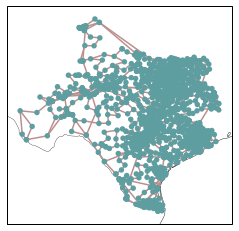

In [5]:
network.plot()

In [6]:
print("Removing lines")
print(f"Initial number of lines: {network.lines.shape[0]}")
remove_lines_random(network)
print(f"Resulting number of lines: {network.lines.shape[0]}")
print("Removed Lines:")
display(removed_lines)

Removing lines
Initial number of lines: 3205
Resulting number of lines: 3204
Removed Lines:


,name,bus0,bus1,r,x,b,rateA,rateB,rateC,ratio,...,terrain_factor,num_parallel,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
103136,103136,3007368,3007016,0.002,0.01369,0.00233,221.0,0.0,0.0,0.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print("Disconnecting buses")
print(f"Initial number of lines: {network.lines.shape[0]}")
disconnect_buses_random(network)
print(f"Resulting number of lines: {network.lines.shape[0]}")
print("Removed Lines:")
display(removed_lines)
print("Buses Disconnected:")
display(buses_disconnected)

Disconnecting buses
Initial number of lines: 3204
Resulting number of lines: 3200
Removed Lines:


,name,bus0,bus1,r,x,b,rateA,rateB,rateC,ratio,...,terrain_factor,num_parallel,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
name,,,,,,,,,,,,,,,,,,,,,
103136,103136,3007368,3007016,0.00200,0.01369,0.00233,221.0,0.0,0.0,0.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101753,101753,3005010,3005096,0.00127,0.00969,0.00509,310.0,0.0,0.0,0.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101754,101754,3005010,3005096,0.00127,0.00969,0.00509,310.0,0.0,0.0,0.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101755,101755,3005386,3005010,0.00106,0.00803,0.00422,310.0,0.0,0.0,0.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101756,101756,3005386,3005010,0.00106,0.00803,0.00422,310.0,0.0,0.0,0.0,...,1.0,1.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Buses Disconnected:


,y,x,v_nom,v_mag_pu_max,v_mag_pu_min,type,carrier,unit,v_mag_pu_set,control,sub_network
name,,,,,,,,,,,
3005010,33.0316,-96.6732,161.0,1.1,0.9,,AC,None,1.0,PQ,


In [8]:
print('Reducing Generators Capacity:')
reduce_generators_random(network)
print("Generators Reduced:")
display(reduced_generators)

Reducing Generators Capacity:
Generators Reduced:


,bus,p_nom,Qmax,Qmin,Vg,mBase,p_nom_max,p_nom_min,Pc1,Pc2,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt,reduction_factor
name,,,,,,,,,,,,,,,,,,,,,
13387,3008035,0.0,119.58,-26.08,1.04,281.91,234.93,70.48,0,0,...,0,0,1,0,NaN,NaN,1.0,1.0,0.0,0
